### Unidad 3, Computación III
Carrera Física Aplicada, INSPT UTN<br>
Daiana Dominikow.

# Métodos numéricos: Derivadas

## Definición de Derivada
La derivada es la tasa de cambio de una función, que puede aproximarse numéricamente como la pendiente de la recta tangente a la misma en un punto. 

En general, se utilizan las siguientes tres:

$( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h})$

$( f'(x)=\lim_{h\rightarrow 0}\frac{f(x)-f(x-h)}{h})$

$( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x-h)}{2h})$

### Implementación numérica de las derivadas de primer orden
Diferencia hacia adelante
$( f'(x_n)\approx\frac{f(x_{n+1})-f(x_n)}{x_{n+1}-x_n})$

Diferencia hacia atrás
$( f'(x)\approx\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}})$

Diferencia valor central
$( f'(x)\approx\frac{f(x_{n+1})-f(x_{n-1})}{x_{n+1}-x_{n-1}})$

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.Ze2RAK0CmQB9THRzllOPCAHaEx%26pid%3DApi&f=1&ipt=53bec1288c3068e4e677b86ea820d0f88b7218666006936622dc0b859755b168&ipo=images" width="450" height="300">

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Para una función ejemplo
$f(x)=cos(x)x-\frac{1}{10}x$

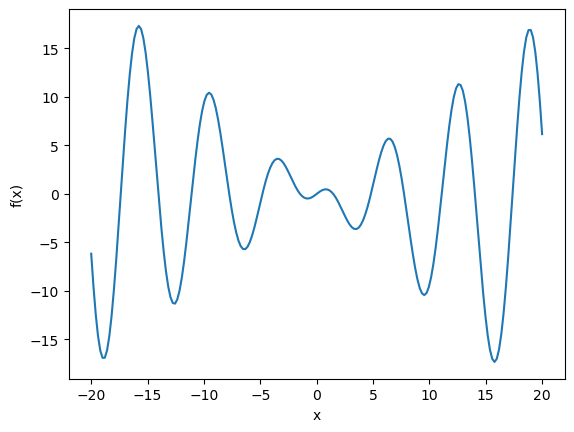

In [2]:
def f(x):
    return np.cos(x)*x - (1/10)*x

#creo una lista de valores x
x = np.linspace(-20,20,200)
y = f(x)

#ploteo la función
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)


Ahora, determino las derivadas  

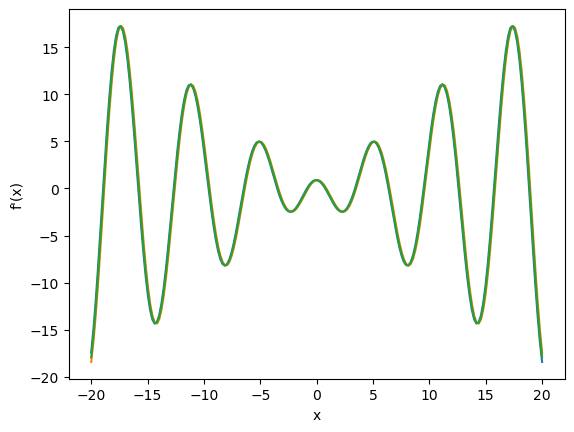

In [3]:
h = 0.1 #tiene que tender a cero
derivada_adelante = ( f(x+h) - f(x) ) / h
derivada_atras = ( f(x) - f(x-h) ) / h
derivada_central = ( f(x+h) - f(x-h) ) / (2*h)

#ploteo la función
plt.xlabel('x')
plt.ylabel('''f'(x)''')
plt.plot(x,derivada_adelante)
plt.plot(x,derivada_atras)
plt.plot(x,derivada_central)

### Bonus track

ahora quiero aproximar visualmente el error de los métodos, para ello  saco la derivada analítica
$ f'(x) = \cos \left(x\right)-x\sin \left(x\right)-\frac{1}{10}$

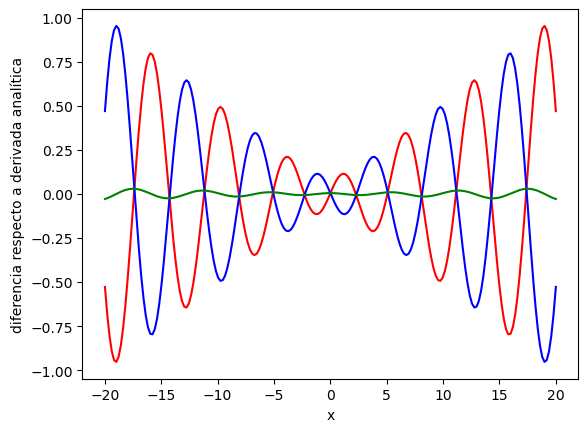

In [4]:
d_analitica = np.cos(x) - x* np.sin(x) - 1 /10
plt.plot(x, d_analitica - derivada_adelante,'red')
plt.plot(x, d_analitica - derivada_atras,'blue')
plt.plot(x, d_analitica - derivada_central,'green')
plt.xlabel('x')
plt.ylabel('diferencia respecto a derivada analítica')
plt.show()

## Integrales
### Repaso teórico: Método de los trapecios

<center><img src="./resources/Trapezoidal_rule_illustration.png" width="400" height="280" ></center>

La regla se basa en aproximar el valor de $f(x)$ por el de la función lineal que pasa por los puntos $(a, f(a))$ y $(b, f(b))$ aproximando la integral definida entre estos puntos $a$, $b$ al área debajo de la función lineal, como se observa en la figura a continuación.

<center><img src="./resources/trapezoidal-compuesta.png" width="400" height="280" ></center>

Para llegar a una mejor aproximación, la función puede dividirse en $n$ trapecios, disminuyendo considerablemente el error a medida que la cantidad de trapecios es mayor, es decir, mientras mas pequeño sea el $dx$, mejor se puede aproximar el cálculo integral.

La integral entonces puede calcularse como la sumatoria de cada pequeño trapecio de área de base $dx$ y  altura $f(x)$.
 
\begin{equation} 
    \int_{b}^{a} f(x) \,dx \approx [ f(b) + f(a) ] \frac{b - a}{2}
\end{equation}


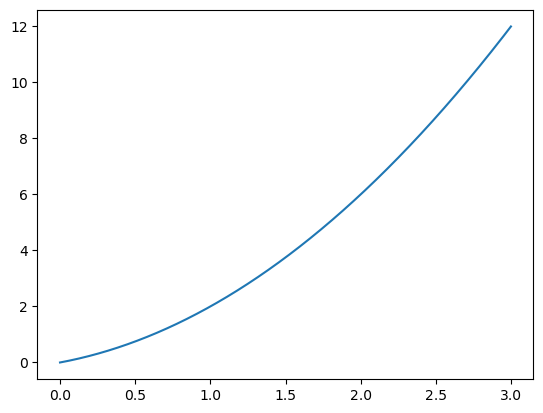

la integral tiene un valor aprox de: 13.49


In [5]:
import numpy as np
import matplotlib.pyplot as plt

#defino una funcion f(x) que me devuelva un vector con la ordenada correspondiente a un valor dado (devuelve el valor de la funcion en cada miembro del array)
def y(x):
  return x + x**2
  
#creo una funcion integral que dados dos vectores (x, y(x)), me devuelva  la sumatoria del area de cada trapecio
def integral(dx,y):
  i=0
  z=0
  while i < len(x)-1:
    z += y[i+1] * (dx)
    i = i + 1
  return z

# defino el diferencial y creo con el un vector de un intervalo np.arange(inicio, fin, dx)
dx = 0.001
x = np.arange(0,3,dx)

#utilizo la primer funcion para obtener vector y con las ordenadas de x
y =  y(x)
#grafico la funcion
plt.plot(x,y)
plt.show()

#imprimo el resultado
print( "la integral tiene un valor aprox de: " + str(round(integral(dx,y),2)) )

